[4, 5, 4, 3, 1, 2, 6, 2, 5, 2, 4, 5, 2, 5, 2, 3, 3, 3, 4, 3, 6, 6, 5, 3, 2, 4, 5, 6, 6, 0, 9, 5, 6, 3, 6, 1, 3, 2, 2, 1, 4, 7, 1, 5, 8, 8, 8, 4, 4, 7, 5, 2, 5, 3, 6, 7, 7, 2, 5, 3, 2, 3, 8, 2, 10, 7, 7, 8, 2, 2, 9, 4, 11, 3, 6, 4, 2, 3, 2, 3, 6, 1, 3, 4, 8, 3, 3, 7, 3, 4, 3, 12, 2, 6, 1, 7, 4, 7, 6, 3]
100


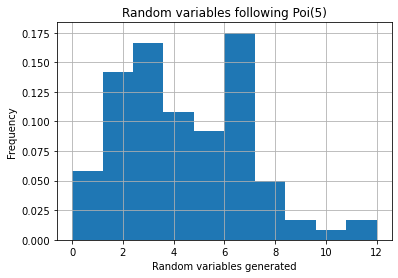

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

n = 5000
m1 = 2**32 - 209
m2 = 2**32 - 22853

x = np.zeros(n+3)
y = np.zeros(n+3)
U = np.zeros(n)   # Generated random numbers 

x[0] = 15
y[0] = 20

## need to choose numbers for x[1],x[2],y[1] & y[2]

x[1] = 8
y[1] = 15

x[2] = 25
y[2] = 5

for i in range(3,n+3):
    x[i] = (1403580*x[i-2] - 810728*x[i-3]) % m1
    y[i] = (527612*y[i-2] - 1370589*y[i-3]) % m2
    
for i in range(3,n+3):
    if x[i]<=y[i]:
        U[i-3] = (x[i]-y[i]+m1)/(m1+1)
    else:
        U[i-3] = (x[i]-y[i])/(m1+1)
#print(U)
        
## Generate Random variables following the Poisson Distribution 

L = 5   # Lambda = 5 - Poi(5)
N = 100
e = math.exp((-1)*L)
Poi=[]

KK = 0
CC = 0

while CC<N:
    count = 0 
    a = 1 
    k = 1   # a=1 and n=1 in algorithm step 1
    while count<1:
        a = a*U[KK+k]
        if a >=e:
            k=k+1
        else:
            count=count+1
            P=k-1
            CC=CC+1
    KK=KK+k
    Poi.append(P)

print(len(Poi))

plt.figure(1)
plt.hist(Poi,density=True)
plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following Poi(5)")
plt.grid()
plt.show()